In [2]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
def select_column(column_name: str) -> pd.DataFrame:
    # Connect to the SQLite database
    conn = sqlite3.connect('/work/cse-zhousc/resilient_compute/resilience_test/taiyi/analysis/example.db')

    # Query to extract relevant records
    query = f"""
    SELECT failure_type, failure_rate_set, {column_name}, resilience, node_cnt
    FROM workflow 
    WHERE {column_name} IS NOT NULL
    AND workflow IS 'cholesky'
    AND failure_rate_set IS 0.3;
    """

    # Load data into a DataFrame
    df = pd.read_sql_query(query, conn)
    df = df.sort_values(by=['failure_type'])

    # Close the database connection
    conn.close()

    return df


In [21]:
def draw_df(column_name: str, df: pd.DataFrame):
    # Calculate normalized makespan
    def calculate_normalized_makespan(group):
        avg_makespan_1 = group[group['resilience'] == 1][column_name].mean()
        avg_makespan_0 = group[group['resilience'] == 0][column_name].mean()
        return avg_makespan_1 / avg_makespan_0
    
    sns.set_palette("pastel")
    
    # Filter out 'manager-killed' failure type
    df = df[df['failure_type'] != 'manager-killed']

    normalized_df = df.groupby(['failure_type', 'node_cnt']).apply(calculate_normalized_makespan).reset_index()
    normalized_df.columns = ['failure_type', 'node_cnt', f'normalized_{column_name}']

    # Set up the plot
    plt.figure(figsize=(6, 3))
    sns.set_style("whitegrid")

    # Create the grouped bar plot
    # ax = sns.barplot(x='failure_type', y=f'normalized_{column_name}', hue='workflow', data=normalized_df)

    # Create line chart
    ax = sns.lineplot(x='node_cnt', y=f'normalized_{column_name}', hue='failure_type', data=normalized_df, marker='o')

    # Set x axis to log scale
    ax.set_xscale('log', base=2)
    ax.set_ylim(0, 2)

    # Add a horizontal line at y=1
    plt.axhline(y=1, color='red', linestyle='--')

    # Customize the plot
    # plt.title(f'Normalized {column_name} of Resilience Module by Failure Type and Workflow', fontsize=16)
    plt.xlabel('Number of Node', fontsize=12)
    plt.ylabel(f'Normalized {column_name}', fontsize=15)
    plt.legend(title='Workflow', title_fontsize='15', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')


    # Adjust layout and display the plot
    plt.tight_layout()
    # plt.savefig(f'/work/cse-zhousc/resilient_compute/resilience_test/taiyi/analysis/img/scale_{column_name}.pdf')
    plt.show()

In [22]:
def draw_column(column_name: str):
    df = select_column(column_name)
    draw_df(column_name, df)

/tmp/ipykernel_103243/3865601012.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  normalized_df = df.groupby(['failure_type', 'node_cnt']).apply(calculate_normalized_makespan).reset_index()


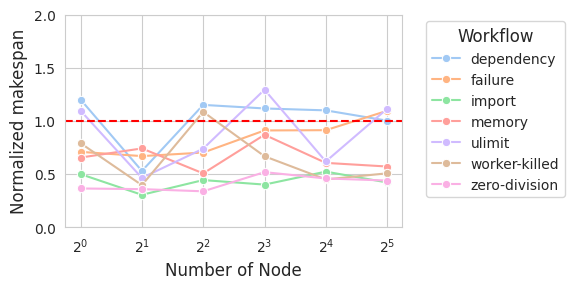

In [23]:
draw_column('makespan')

/tmp/ipykernel_103243/3865601012.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  normalized_df = df.groupby(['failure_type', 'node_cnt']).apply(calculate_normalized_makespan).reset_index()


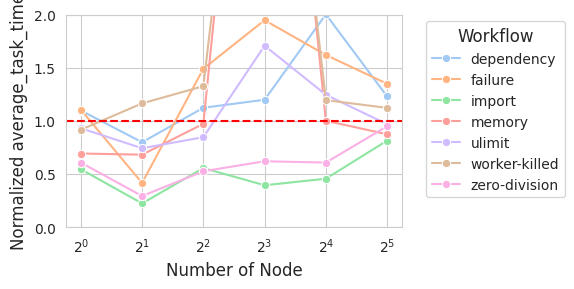

/tmp/ipykernel_103243/3865601012.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  normalized_df = df.groupby(['failure_type', 'node_cnt']).apply(calculate_normalized_makespan).reset_index()


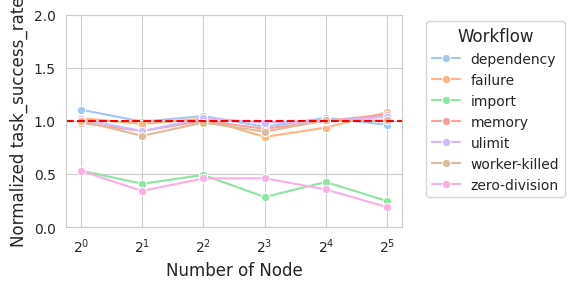

/tmp/ipykernel_103243/3865601012.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  normalized_df = df.groupby(['failure_type', 'node_cnt']).apply(calculate_normalized_makespan).reset_index()


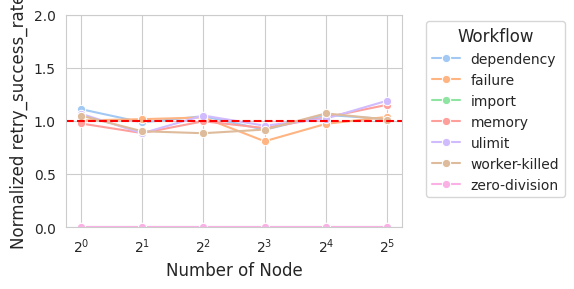

In [24]:
draw_column('average_task_time')
draw_column('task_success_rate')
draw_column('retry_success_rate')

In [3]:
conn = sqlite3.connect('/work/cse-zhousc/resilient_compute/resilience_test/taiyi/analysis/old_example.db')

# Query to extract relevant records
query = f"""
SELECT failure_type, node_cnt, overhead, makespan, task_count, overhead/makespan*100 AS percentage, overhead/task_count AS overhead_per_task, resilience 
FROM workflow 
WHERE overhead IS NOT NULL
AND makespan IS NOT NULL
AND workflow IS 'cholesky'
AND failure_rate_set IS 0.3;
"""

# Load data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()


df = df[df['failure_type'] != 'manager-killed']
df = df[df['resilience'] == 1]

df

,failure_type,node_cnt,overhead,makespan,task_count,percentage,overhead_per_task,resilience
1,memory,2,13.487,177.684009,100,7.590441,0.13487,1
2,zero-division,2,0.000,12.640004,100,0.000000,0.00000,1
4,worker-killed,2,4.904,156.426027,100,3.135028,0.04904,1
5,dependency,2,11.348,51.839992,200,21.890435,0.05674,1
7,worker-killed,2,2.978,127.447025,100,2.336657,0.02978,1
...,...,...,...,...,...,...,...,...
758,failure,32,16.959,84.529012,100,20.062934,0.16959,1
759,zero-division,32,0.000,39.122982,100,0.000000,0.00000,1
760,dependency,32,21.668,64.635015,200,33.523625,0.10834,1
761,ulimit,32,10.377,89.389014,100,11.608809,0.10377,1


In [24]:
def draw_overhead(column_name: str, df: pd.DataFrame):
    sns.set_palette("pastel")
    
    # Filter out 'manager-killed' failure type and resilience != 0
    df = df[df['failure_type'] != 'manager-killed']
    df = df[df['resilience'] != 0]

    # Group by 'failure_type' and 'failure_rate_set', and calculate mean and stderr
    normalized_df = df.groupby(['failure_type', 'node_cnt'])[column_name].agg(['mean', 'sem']).reset_index()
    normalized_df.columns = ['failure_type', 'node_cnt', f'{column_name}_mean', f'{column_name}_stderr']

    plt.rc('font', size=18)  # 控制默认文本的大小
    plt.rc('axes', titlesize=18)  # 控制标题的大小
    plt.rc('axes', labelsize=18)  # 控制x轴和y轴标签的大小
    plt.rc('xtick', labelsize=18)  # 控制x轴刻度的大小
    plt.rc('ytick', labelsize=18)  # 控制y轴刻度的大小
    plt.rc('legend', fontsize=18)  # 控制图例的字体大小

    # Set up the plot
    plt.figure(figsize=(9, 6))
    sns.set_style("whitegrid")

    # Create line chart with error bars
    ax = sns.lineplot(x='node_cnt', y=f'{column_name}_mean', hue='failure_type', data=normalized_df, marker='o')

    # Set x axis to log scale
    ax.set_xscale('log', base=2)

    # Get the colors used by seaborn
    palette = sns.color_palette("pastel", len(normalized_df['failure_type'].unique()))
    color_dict = {ftype: palette[i] for i, ftype in enumerate(normalized_df['failure_type'].unique())}

    # Add error bars manually with the same color as the lines
    for i, row in normalized_df.iterrows():
        plt.errorbar(x=row['node_cnt'], y=row[f'{column_name}_mean'], yerr=row[f'{column_name}_stderr'], 
                     fmt='none', c=color_dict[row['failure_type']], capsize=5)

    # Customize the plot
    plt.xlabel('Number of Node', fontsize=18)
    plt.ylabel(f'Overhead per Task (s)', fontsize=18)
    # 获取当前图例
    handles, labels = plt.gca().get_legend_handles_labels()

    # 将每个图例项的标签首字母大写
    new_labels = []
    for label in labels:
        if label == 'ulimit':
            new_labels.append('ulimit')
        else:
            new_labels.append(label.capitalize())

    # 绘制图例并设置新的标签
    plt.legend(handles, new_labels, title='Failure Type', title_fontsize='18', fontsize='15')
    # plt.legend(title='Failure Type', title_fontsize='12', fontsize='12')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.savefig(f'/work/cse-zhousc/resilient_compute/resilience_test/taiyi/analysis/img/scale_{column_name}.pdf')
    plt.show()


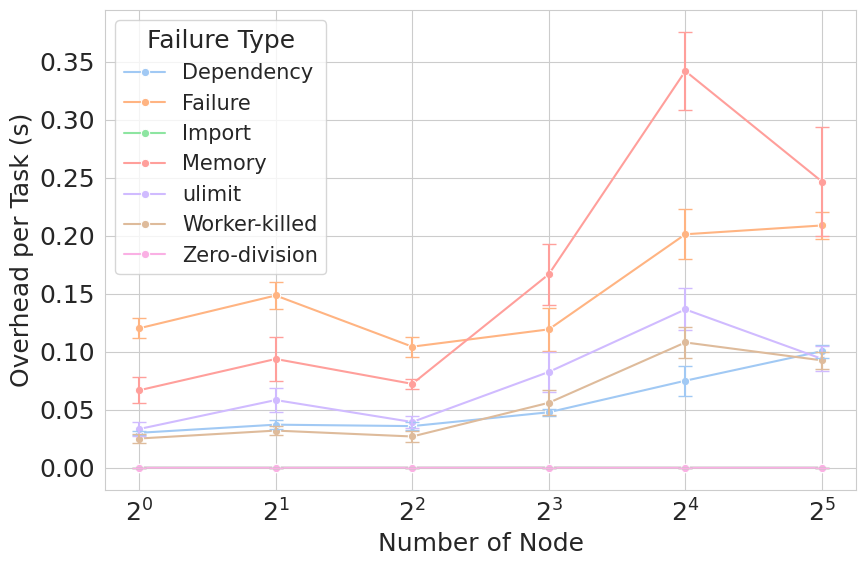

In [25]:
draw_overhead('overhead_per_task', df)